In [1]:
#This dataset is a daily record of the top trending YouTube videos.
#https://www.kaggle.com/harshithgupta/youtubes-channels-dataset
#https://developers.google.com/youtube/v3 

In [2]:
#maximizing view count

# Data Wrangling

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime as dt
from sklearn.preprocessing import scale
from scipy import stats

In [4]:
file = 'YouTubeDataset_withChannelElapsed.json'

with open(file) as train_file:
    data = json.load(train_file)

In [5]:
df = pd.DataFrame.from_dict(pd.json_normalize(data), orient='columns')

In [6]:
df.head()

,totalviews/channelelapsedtime,channelId,videoCategoryId,channelViewCount,likes/subscriber,views/subscribers,videoCount,subscriberCount,videoId,dislikes/views,...,comments/views,totvideos/videocount,elapsedtime,videoLikeCount,videoDislikeCount,dislikes/subscriber,totviews/totsubs,views/elapsedtime,videoPublished,VideoCommentCount
0,0.16519925596076884,UCdzU3DSGzyWzN2118yd9X9g,22,14654,0.5555555555555556,95.11111111111111,30,18,--DwgB78t-c,0.0005841121495327102,...,0.0,488.46666666666664,50040,10,1,0.05555555555555555,814.1111111111111,0.03421262989608313,2012-01-19T18:38:28.000Z,0
1,1.1338200815767217,UC0UnhAG47DRyVZGVcbhAXhQ,10,105909,0.2391304347826087,59.32608695652174,51,184,--NZRkXBV7k,0.00027482594356907294,...,0.00018321729571271528,2076.6470588235293,22080,44,3,0.016304347826086956,575.5923913043479,0.4943840579710145,2015-03-30T04:04:40.000Z,2
2,0.6681201550387597,UCXjtAvK5P3wXBGh0vbGylzg,27,48265,0.023668639053254437,10.289940828402367,72,338,--hoQ2sGG4M,0.0002875215641173088,...,0.0005750431282346176,670.3472222222222,71544,8,1,0.0029585798816568047,142.7958579881657,0.04861344067986134,2009-08-07T06:51:10.000Z,2
3,25.65350494473531,UCeKHMeUlcLNPLCLUfZUQI2w,26,2116722,0.007301256178858102,0.8841775883179901,172,22051,--sBoaqBlzA,0.00030773965225419295,...,0.0005128994204236549,12306.523255813954,54096,161,6,0.00027209650355992926,95.99210920139676,0.3604148181011535,2011-08-04T01:07:38.000Z,10
4,52.773777521761396,UCNWPDyaWf2eAHnofFLSnEMg,20,1649075,0.004545454545454545,10.004545454545454,2777,220,--7h1S4neDM,0.0,...,0.0,593.8332733165287,30120,1,0,0.0,7495.795454545455,0.07307436918990703,2014-04-29T15:44:44.000Z,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575610 entries, 0 to 575609
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   totalviews/channelelapsedtime  575610 non-null  object
 1   channelId                      575610 non-null  object
 2   videoCategoryId                575610 non-null  object
 3   channelViewCount               575610 non-null  object
 4   likes/subscriber               575610 non-null  object
 5   views/subscribers              575610 non-null  object
 6   videoCount                     575610 non-null  object
 7   subscriberCount                575610 non-null  object
 8   videoId                        575610 non-null  object
 9   dislikes/views                 575610 non-null  object
 10  channelelapsedtime             575610 non-null  object
 11  comments/subscriber            575610 non-null  object
 12  likes/views                    575610 non-nu

In [8]:
df = df.drop(columns=['totalviews/channelelapsedtime', 'channelId', 'likes/subscriber', 
                      'views/subscribers', 'dislikes/views', 'videoId',
                      'comments/subscriber', 'likes/views', 'likes/dislikes',
                      'comments/views', 'totvideos/videocount', 'dislikes/subscriber',
                      'totviews/totsubs', 'views/elapsedtime'])

In [9]:
numeric = df.columns.drop(['videoCategoryId', 'videoPublished'])

df[numeric] = df[numeric].apply(pd.to_numeric, errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575610 entries, 0 to 575609
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   videoCategoryId      575610 non-null  object
 1   channelViewCount     575610 non-null  int64 
 2   videoCount           575610 non-null  int64 
 3   subscriberCount      575610 non-null  int64 
 4   channelelapsedtime   575610 non-null  int64 
 5   channelCommentCount  575610 non-null  int64 
 6   videoViewCount       575610 non-null  int64 
 7   elapsedtime          575610 non-null  int64 
 8   videoLikeCount       575610 non-null  int64 
 9   videoDislikeCount    575610 non-null  int64 
 10  videoPublished       575610 non-null  object
 11  VideoCommentCount    575610 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 52.7+ MB


In [11]:
df['videoPublished'] = pd.to_datetime(df['videoPublished'])
df['Year'] = df.videoPublished.dt.year
#df['Month'] = df.videoPublished.dt.month
df['Weekday'] = df.videoPublished.dt.weekday
df['Day'] = df.videoPublished.dt.day
df['Hour'] = df.videoPublished.dt.hour

In [12]:
df.videoPublished.min(), df.videoPublished.max()

(Timestamp('2005-08-06 23:14:29+0000', tz='UTC'),
 Timestamp('2015-10-05 17:54:24+0000', tz='UTC'))

In [13]:
df = df[df.Year >= 2013]

df.shape

(219636, 16)

In [14]:
df = df.drop(columns=['videoPublished'])

In [15]:
df = df[df.videoViewCount >= 0]

df.shape

(219570, 15)

In [16]:
df_num = ['channelViewCount', 'videoCount', 'channelelapsedtime', 'videoLikeCount',
          'videoDislikeCount', 'VideoCommentCount','channelCommentCount', 
          'videoViewCount', 'elapsedtime']

In [17]:
#ask about this
df = df[(np.abs(stats.zscore(df[df_num])) < 3).all(axis=1)]

df.shape

(213963, 15)

In [18]:
df.videoCategoryId.value_counts().sort_values(ascending=True)

30        3
44      132
43      400
29     1440
15     2528
25     3801
23     4013
19     4379
27     6221
1      8234
28     8969
2     11107
26    14976
17    18678
24    23826
10    31778
20    33612
22    39866
Name: videoCategoryId, dtype: int64

In [19]:
df.reset_index(drop=True, inplace=True)

In [20]:
df.head()

,videoCategoryId,channelViewCount,videoCount,subscriberCount,channelelapsedtime,channelCommentCount,videoViewCount,elapsedtime,videoLikeCount,videoDislikeCount,VideoCommentCount,Year,Weekday,Day,Hour
0,10,105909,51,184,93409,8,10916,22080,44,3,2,2015,0,30,4
1,20,1649075,2777,220,31248,0,2201,30120,1,0,0,2014,1,29,15
2,20,45363,2,90,49584,0,45203,38064,65,36,6,2013,5,1,18
3,20,69412632,4213,327143,47376,46,1577,35568,105,2,158,2013,5,14,15
4,26,625569,310,7710,37872,5,85817,37464,463,287,112,2013,3,27,3


In [21]:
df.isnull().sum()

videoCategoryId        0
channelViewCount       0
videoCount             0
subscriberCount        0
channelelapsedtime     0
channelCommentCount    0
videoViewCount         0
elapsedtime            0
videoLikeCount         0
videoDislikeCount      0
VideoCommentCount      0
Year                   0
Weekday                0
Day                    0
Hour                   0
dtype: int64

# Exploratory Data Analysis

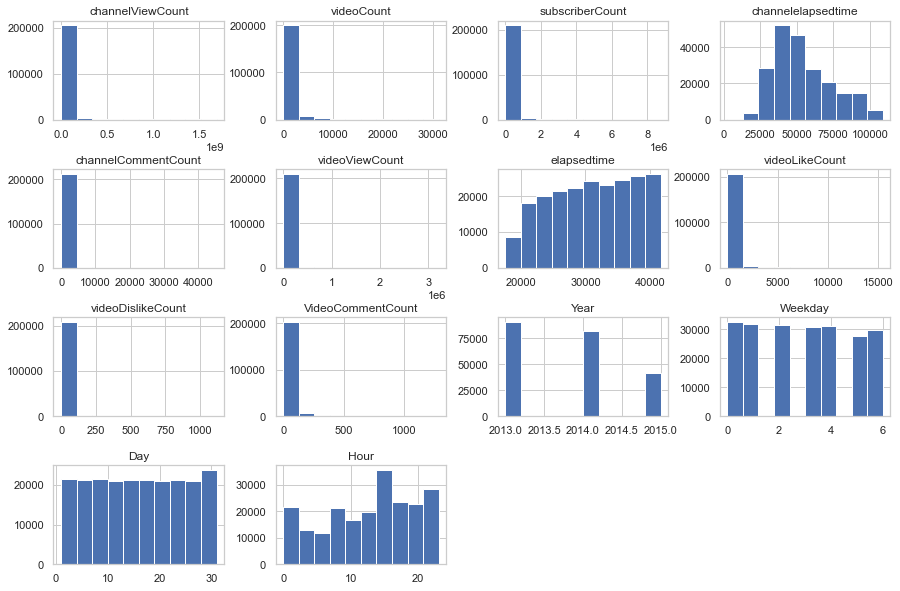

In [22]:
sns.set_theme(style = "whitegrid")

df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

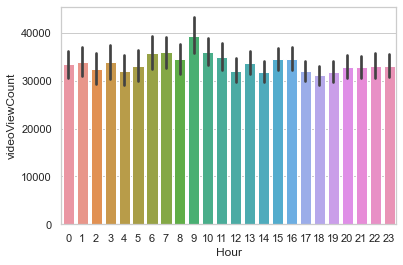

In [23]:
ax = sns.barplot(x="Hour", y="videoViewCount", data=df)

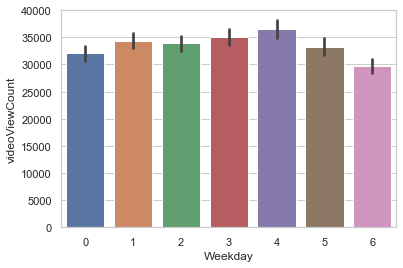

In [24]:
ax = sns.barplot(x="Weekday", y="videoViewCount", data=df)

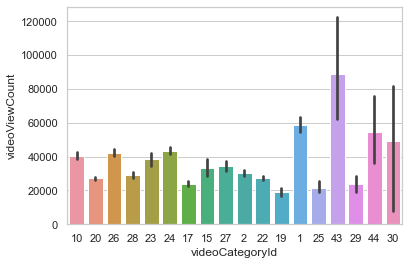

In [25]:
ax = sns.barplot(x="videoCategoryId", y="videoViewCount", data=df)